### Packeges

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
from collections import Counter
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## warning  hide

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Data set

In [3]:
data = pd.read_csv("C:\\Users\\Kamrul Hasan\\Desktop\\Task_2\\train.csv")

data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


## finding missing value

In [4]:
data[pd.isnull(data).any(axis=1)]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [5]:
Y = data.price_range.copy()
X = data.drop(['price_range'], axis=1)

In [6]:
data['price_range'].value_counts()

0    500
1    500
2    500
3    500
Name: price_range, dtype: int64

## correlation

In [7]:
def pearson(X,Y):
    correlation_matrix = np.corrcoef(X,Y)
    return correlation_matrix[0,1]

X.corr(method ='pearson')

In [8]:
print(pearson(X.battery_power, Y))
print(pearson(X.blue, Y))
print(pearson(X.clock_speed, Y))
print(pearson(X.dual_sim, Y))
print(pearson(X.fc, Y))
print(pearson(X.four_g, Y))
print(pearson(X.int_memory, Y))
print(pearson(X.m_dep, Y))
print(pearson(X.mobile_wt, Y))
print(pearson(X.n_cores, Y))
print(pearson(X.px_height, Y))
print(pearson(X.px_width, Y))
print(pearson(X.ram, Y))
print(pearson(X.sc_h, Y))
print(pearson(X.sc_w, Y))
print(pearson(X.talk_time, Y))
print(pearson(X.three_g, Y))
print(pearson(X.touch_screen, Y))
print(pearson(X.wifi, Y))

0.20072261211373102
0.020572854061418504
-0.006605690881732071
0.017444479237224732
0.02199820777690427
0.0147717114172394
0.04443495938898743
0.0008530365050864312
-0.030302171314386415
0.004399274799457285
0.1488575550004218
0.16581750172625515
0.9170457362649905
0.022986073167424414
0.038711271664484154
0.02185887116237479
0.023611216880045017
-0.030411071898218043
0.018784812012789004


## covariance

In [9]:
print(np.cov(X.battery_power, Y)[0,1])
print(np.cov(X.blue, Y)[0,1])
print(np.cov(X.clock_speed, Y)[0,1])
print(np.cov(X.dual_sim, Y)[0,1])
print(np.cov(X.fc, Y)[0,1])
print(np.cov(X.four_g, Y)[0,1])
print(np.cov(X.int_memory, Y)[0,1])
print(np.cov(X.m_dep, Y)[0,1])
print(np.cov(X.mobile_wt, Y)[0,1])
print(np.cov(X.n_cores, Y)[0,1])
print(np.cov(X.px_height, Y)[0,1])
print(np.cov(X.px_width, Y)[0,1])
print(np.cov(X.ram, Y)[0,1])
print(np.cov(X.sc_h, Y)[0,1])
print(np.cov(X.sc_w, Y)[0,1])
print(np.cov(X.talk_time, Y)[0,1])
print(np.cov(X.three_g, Y)[0,1])
print(np.cov(X.touch_screen, Y)[0,1])
print(np.cov(X.wifi, Y)[0,1])

98.63656828414209
0.011505752876438225
-0.006028014007003509
0.009754877438719355
0.10680340170085041
0.00825412706353177
0.9017008504252125
0.0002751375687843934
-1.1995997998999504
0.011255627813906939
73.8759379689845
80.1453226613307
1112.4412206103048
0.10830415207603797
0.18859429714857423
0.13356678339169586
0.011255627813906956
-0.01700850425212606
0.010505252626313155


In [10]:
data.drop(['m_dep'], axis=1, inplace=True)
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


## test and train

In [11]:
Y = data.price_range.copy()
X = data.drop(['price_range'], axis=1)

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=123)

## Logistic Regression Model

In [13]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [14]:
Y_pred = pd.Series(model.predict(X_test))

In [15]:
Y_test = Y_test.reset_index(drop=True)
Z = pd.concat([Y_test, Y_pred], axis = 1)
Z.columns = ['True', 'Prediction']

acc_log = metrics.accuracy_score(Y_test, Y_pred)
pre_log = metrics.precision_score(Y_test,Y_pred, average='macro')
recall_log = metrics.recall_score(Y_test,Y_pred, average='macro')
f1_log = metrics.f1_score(Y_test,Y_pred, average='macro')

In [16]:
Z.head()

,True,Prediction
0,1,1
1,3,3
2,3,3
3,1,3
4,3,3


In [17]:
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print("Precision:", metrics.precision_score(Y_test, Y_pred,average='macro'))
print("Recall:", metrics.recall_score(Y_test, Y_pred,average='macro'))
print("f1-score:", metrics.f1_score(Y_test,Y_pred, average='macro'))


Accuracy: 0.63
Precision: 0.6296317276133904
Recall: 0.6423569382525851
f1-score: 0.6266774294967103


Text(0.5, 15.0, 'Predicted')

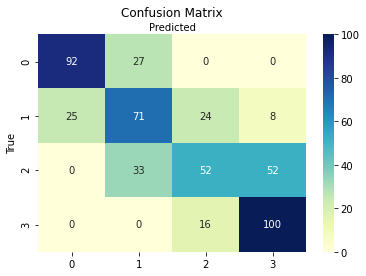

In [18]:
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "YlGnBu", fmt="g")
ax.xaxis.set_label_position("top")
plt.title('Confusion Matrix', Y =1.25)
plt.ylabel("True")
plt.xlabel("Predicted")

## Classification KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
#X_train, X_test, Y_train, Y_test

knn = KNeighborsClassifier(n_neighbors = 3)
for i in tqdm(range(10)):
    knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)

acc_knn = metrics.accuracy_score(Y_test, Y_pred)
pre_knn = metrics.precision_score(Y_test,Y_pred, average='macro')
recall_knn = metrics.recall_score(Y_test,Y_pred, average='macro')
f1_knn = metrics.f1_score(Y_test,Y_pred, average='macro')

  0%|          | 0/10 [00:00<?, ?it/s]

In [21]:
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print("Precision:", metrics.precision_score(Y_test, Y_pred,average='macro'))
print("Recall:", metrics.recall_score(Y_test, Y_pred,average='macro'))
print("f1-score:", metrics.f1_score(Y_test,Y_pred, average='macro'))


Accuracy: 0.924
Precision: 0.9245041019843168
Recall: 0.9256269290531466
f1-score: 0.9249370660475741


## Classification SVM

In [22]:
from sklearn.svm import SVC, LinearSVC

In [23]:
#X_train, X_test, Y_train, Y_test,Y_pred

linear_svc = LinearSVC()
for i in tqdm(range(10)):
    linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = metrics.accuracy_score(Y_test, Y_pred)
pre_linear_svc = metrics.precision_score(Y_test,Y_pred, average='macro')
recall_linear_svc = metrics.recall_score(Y_test,Y_pred, average='macro')
f1_linear_svc = metrics.f1_score(Y_test,Y_pred, average='macro')

  0%|          | 0/10 [00:00<?, ?it/s]

In [24]:
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print("Precision:", metrics.precision_score(Y_test, Y_pred,average='macro'))
print("Recall:", metrics.recall_score(Y_test, Y_pred,average='macro'))
print("f1-score:", metrics.f1_score(Y_test,Y_pred, average='macro'))


Accuracy: 0.368
Precision: 0.32207207207207206
Recall: 0.36764705882352944
f1-score: 0.27188811188811185


## Classification Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB

In [26]:
#X_train, X_test, Y_train, Y_test,Y_pred
gaussian = GaussianNB() 
for i in tqdm(range(10)):
    gaussian.fit(X_train, Y_train)  
Y_pred = gaussian.predict(X_test)

acc_gaussian = metrics.accuracy_score(Y_test, Y_pred)
pre_gaussian = metrics.precision_score(Y_test,Y_pred, average='macro')
recall_gaussian = metrics.recall_score(Y_test,Y_pred, average='macro')
f1_gaussian = metrics.f1_score(Y_test,Y_pred, average='macro')

  0%|          | 0/10 [00:00<?, ?it/s]

In [27]:
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print("Precision:", metrics.precision_score(Y_test, Y_pred,average='macro'))
print("Recall:", metrics.recall_score(Y_test, Y_pred,average='macro'))
print("f1-score:", metrics.f1_score(Y_test,Y_pred, average='macro'))


Accuracy: 0.81
Precision: 0.811141205720093
Recall: 0.8165857458009633
f1-score: 0.813400321994246


## Classification Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
decision_tree = DecisionTreeClassifier() 
for i in tqdm(range(10)):
    decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)

acc_decision = metrics.accuracy_score(Y_test, Y_pred)
pre_decision = metrics.precision_score(Y_test,Y_pred, average='macro')
recall_decision = metrics.recall_score(Y_test,Y_pred, average='macro')
f1_decision = metrics.f1_score(Y_test,Y_pred, average='macro')

  0%|          | 0/10 [00:00<?, ?it/s]

In [30]:
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print("Precision:", metrics.precision_score(Y_test, Y_pred,average='macro'))
print("Recall:", metrics.recall_score(Y_test, Y_pred,average='macro'))
print("f1-score:", metrics.f1_score(Y_test,Y_pred, average='macro'))


Accuracy: 0.848
Precision: 0.8483396717148324
Recall: 0.8528707083607417
f1-score: 0.8496354272122808


## Perceptron

In [31]:
from sklearn.linear_model import Perceptron

In [32]:
ppn=Perceptron()
for i in tqdm(range(10)):
    ppn.fit(X_train,Y_train)
Y_pred=ppn.predict(X_test)

acc_ppn=metrics.accuracy_score(Y_test,Y_pred)
pre_ppn = metrics.precision_score(Y_test,Y_pred, average='macro')
recall_ppn = metrics.recall_score(Y_test,Y_pred, average='macro')
f1_ppn = metrics.f1_score(Y_test,Y_pred, average='macro')

  0%|          | 0/10 [00:00<?, ?it/s]

In [33]:
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print("Precision:", metrics.precision_score(Y_test, Y_pred,average='macro'))
print("Recall:", metrics.recall_score(Y_test, Y_pred,average='macro'))
print("f1-score:", metrics.f1_score(Y_test,Y_pred, average='macro'))


Accuracy: 0.482
Precision: 0.3433688387635756
Recall: 0.5114233193277311
f1-score: 0.3532236189328033


## Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rf = RandomForestClassifier()
for i in tqdm(range(10)):
    rf.fit(X_train,Y_train)
Y_pred = rf.predict(X_test)

acc_rf = metrics.accuracy_score(Y_test, Y_pred)
pre_rf = metrics.precision_score(Y_test,Y_pred, average='macro')
recall_rf = metrics.recall_score(Y_test,Y_pred, average='macro')
f1_rf = metrics.f1_score(Y_test,Y_pred, average='macro')

  0%|          | 0/10 [00:00<?, ?it/s]

In [36]:
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print("Precision:", metrics.precision_score(Y_test, Y_pred,average='macro'))
print("Recall:", metrics.recall_score(Y_test, Y_pred,average='macro'))
print("f1-score:", metrics.f1_score(Y_test,Y_pred, average='macro'))


Accuracy: 0.876
Precision: 0.8765043585740308
Recall: 0.8797048844471718
f1-score: 0.877653287538946


## Stochastic Gradient Descent

In [37]:
from sklearn.linear_model import SGDClassifier

In [38]:
SGD = SGDClassifier()
SGD.fit(X_train, Y_train)
for i in tqdm(range(10)):
    Y_pred = SGD.predict(X_test)

acc_SGD = metrics.accuracy_score(Y_test, Y_pred)
pre_SGD = metrics.precision_score(Y_test,Y_pred, average='macro')
recall_SGD = metrics.recall_score(Y_test,Y_pred, average='macro')
f1_SGD = metrics.f1_score(Y_test,Y_pred, average='macro')

  0%|          | 0/10 [00:00<?, ?it/s]

In [39]:
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print("Precision:", metrics.precision_score(Y_test, Y_pred,average='macro'))
print("Recall:", metrics.recall_score(Y_test, Y_pred,average='macro'))
print("f1-score:", metrics.f1_score(Y_test,Y_pred, average='macro'))


Accuracy: 0.496
Precision: 0.5143231154883697
Recall: 0.5058276812880325
f1-score: 0.45521710699959883


In [40]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression','Naive Bayes', 
              'Decision Tree', 'Perceptron', 'Random Forest', 'Stochastic Gradient Descent'],
    'Accuracy': [acc_linear_svc, acc_knn, acc_log, 
             acc_gaussian, acc_decision, acc_ppn, acc_rf, acc_SGD],
    'Precission': [pre_linear_svc, pre_knn, pre_log, 
             pre_gaussian, pre_decision, pre_ppn, pre_rf, pre_SGD],
    'Recall': [recall_linear_svc, recall_knn, recall_log, 
             recall_gaussian, recall_decision, recall_ppn, recall_rf, recall_SGD],
    'F1-Score': [f1_linear_svc, f1_knn, f1_log, 
             f1_gaussian, f1_decision, f1_ppn, f1_rf, f1_SGD]})

result_df = results.sort_values(by='Accuracy', ascending=False)
result_df = result_df.set_index('Accuracy')
result_df

,Model,Precission,Recall,F1-Score
Accuracy,,,,
0.924,KNN,0.924504,0.925627,0.924937
0.876,Random Forest,0.876504,0.879705,0.877653
0.848,Decision Tree,0.848340,0.852871,0.849635
0.810,Naive Bayes,0.811141,0.816586,0.813400
0.630,Logistic Regression,0.629632,0.642357,0.626677
0.496,Stochastic Gradient Descent,0.514323,0.505828,0.455217
0.482,Perceptron,0.343369,0.511423,0.353224
0.368,Support Vector Machines,0.322072,0.367647,0.271888


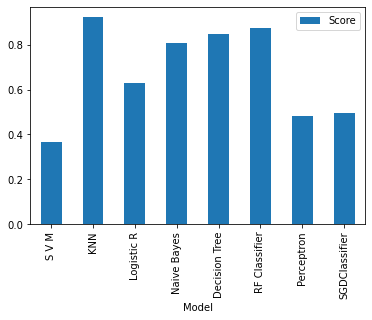

In [41]:
results= pd.DataFrame({'Model': ['S V M', 'KNN', 'Logistic R','Naive Bayes',  
              'Decision Tree',  'RF Classifier', 'Perceptron', 'SGDClassifier'], 'Score': [acc_linear_svc, acc_knn, acc_log, 
             acc_gaussian, acc_decision, acc_rf, acc_ppn,acc_SGD ]})

ax = results.plot.bar(x='Model', y='Score', rot=90)